<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Jupyter Notebook for the Final Project</p><br>

<h1 style="font-size:2em;color:#2467C0">Case Study: Netflix Movies and TV Shows Data Analysis</h1>

### Proposed Question1: What are the most frequent genres for long-running TV shows (at least five seasons long)?
### Proposed Question2: Can we build a machine-learning model that estimates the content rating of a Netflix movie or TV show based on all other attributes?
### Proposed Question3: What are the most frequent themes or topics based on Netflix TV shows and movie descriptions?
##### Disclaimer: Throughout the project, I will leverage part of the codes Dr. Porter and Dr. Altintas illustrated in the lecture.

<h1 style="font-size:2em;color:#2467C0">Data Engineering: Step 1, Acquire Data</h1>

This Notebook uses a dataset from the Kaggle website. Here is the link to the data source: https://www.kaggle.com/datasets/shivamb/netflix-shows<br>
<br>Once the download completes, please ensure the data file **netflix_titles** in the same directory this **Notebook** lives.

# Proposed Question1: What are the most frequent genres for long-running TV shows (at least five seasons long)?

<h1 style="font-size:2em;color:#2467C0">Data Engineering: Step 2A, Exploring Data</h1>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./netflix_titles.csv')
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [2]:
# Remove rows with missing 'duration' data
# These rows are not useful for the analysis and predictive model, so they are removed
df.dropna(subset=['duration'], inplace=True)

df.duration.isnull().sum()

0

In [3]:
# Convert 'duration' to separate features 'movie_duration' and 'show_seasons'
# This is done because the 'duration' column contains different types of information for movies and TV shows
# For movies, it contains the duration in minutes, while for TV shows, it contains the number of seasons
is_movie = df['duration'].str.contains('min')
is_show = df['duration'].str.contains('Season')
df.loc[is_movie, 'movie_duration'] = df.loc[is_movie, 'duration'].str.replace(' min', '').astype(int)
df.loc[is_show, 'show_seasons'] = df.loc[is_show, 'duration'].str.replace(' Season(s)?', '', regex=True).astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8804 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   show_id         8804 non-null   object 
 1   type            8804 non-null   object 
 2   title           8804 non-null   object 
 3   director        6170 non-null   object 
 4   cast            7979 non-null   object 
 5   country         7973 non-null   object 
 6   date_added      8794 non-null   object 
 7   release_year    8804 non-null   int64  
 8   rating          8800 non-null   object 
 9   duration        8804 non-null   object 
 10  listed_in       8804 non-null   object 
 11  description     8804 non-null   object 
 12  movie_duration  6128 non-null   float64
 13  show_seasons    2676 non-null   float64
dtypes: float64(2), int64(1), object(11)
memory usage: 1.0+ MB


In [4]:
# Filter for long-running TV shows (more than 8 seasons)
long_running_shows = df[(df['type'] == 'TV Show') & (df['show_seasons'] >= 5)]

len(long_running_shows)

164

In [5]:
long_running_shows = long_running_shows.assign(listed_in=long_running_shows['listed_in'].str.split(',')).explode('listed_in')

long_running_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,movie_duration,show_seasons
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,British TV Shows,A talented batch of amateur bakers face off in...,NaN,9.0
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,Reality TV,A talented batch of amateur bakers face off in...,NaN,9.0
21,s22,TV Show,Resurrection: Ertugrul,NaN,"Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar...",Turkey,"September 22, 2021",2018,TV-14,5 Seasons,International TV Shows,When a good deed unwittingly endangers his cla...,NaN,5.0
21,s22,TV Show,Resurrection: Ertugrul,NaN,"Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar...",Turkey,"September 22, 2021",2018,TV-14,5 Seasons,TV Action & Adventure,When a good deed unwittingly endangers his cla...,NaN,5.0
21,s22,TV Show,Resurrection: Ertugrul,NaN,"Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar...",Turkey,"September 22, 2021",2018,TV-14,5 Seasons,TV Dramas,When a good deed unwittingly endangers his cla...,NaN,5.0


In [6]:
# Trim whitespace
long_running_shows['listed_in'] = long_running_shows['listed_in'].str.strip()

long_running_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,movie_duration,show_seasons
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,British TV Shows,A talented batch of amateur bakers face off in...,NaN,9.0
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,Reality TV,A talented batch of amateur bakers face off in...,NaN,9.0
21,s22,TV Show,Resurrection: Ertugrul,NaN,"Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar...",Turkey,"September 22, 2021",2018,TV-14,5 Seasons,International TV Shows,When a good deed unwittingly endangers his cla...,NaN,5.0
21,s22,TV Show,Resurrection: Ertugrul,NaN,"Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar...",Turkey,"September 22, 2021",2018,TV-14,5 Seasons,TV Action & Adventure,When a good deed unwittingly endangers his cla...,NaN,5.0
21,s22,TV Show,Resurrection: Ertugrul,NaN,"Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar...",Turkey,"September 22, 2021",2018,TV-14,5 Seasons,TV Dramas,When a good deed unwittingly endangers his cla...,NaN,5.0


In [7]:
# Count the occurrences of each genre
genre_counts = long_running_shows['listed_in'].value_counts()

genre_counts

TV Comedies                     62
TV Dramas                       60
International TV Shows          33
Crime TV Shows                  29
Kids' TV                        24
TV Action & Adventure           22
British TV Shows                16
Classic & Cult TV               14
TV Sci-Fi & Fantasy             14
Romantic TV Shows               10
Docuseries                       9
TV Mysteries                     9
TV Horror                        8
Teen TV Shows                    8
Anime Series                     6
Reality TV                       6
TV Thrillers                     5
Stand-Up Comedy & Talk Shows     5
Spanish-Language TV Shows        5
Korean TV Shows                  1
Science & Nature TV              1
Name: listed_in, dtype: int64

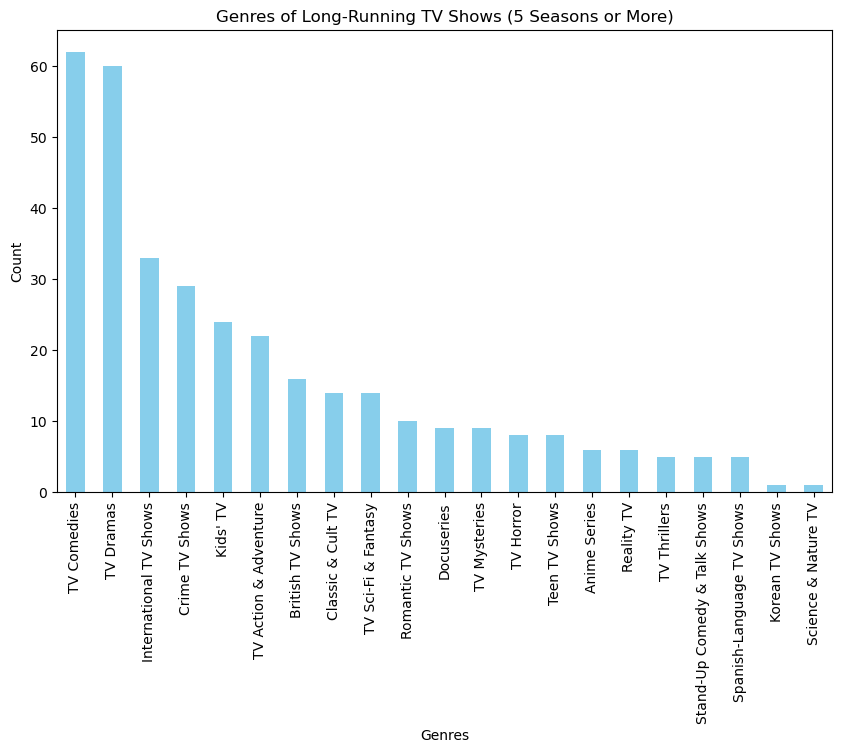

In [8]:
# Create the plot
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genres of Long-Running TV Shows (5 Seasons or More)')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Proposed Question2: Can we build a machine-learning model that estimates the content rating of a Netflix movie or TV show based on all other attributes?

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [10]:
# Load the Netflix titles data from the CSV file
data = pd.read_csv('./netflix_titles.csv')

data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<h1 style="font-size:2em;color:#2467C0">Data Engineering: Step 2B, Pre-Processing Data</h1>

In [11]:
# Keep a copy of the original data for later use, specifically for restoring the 'cast' column
data_copy = data.copy()

In [12]:
# Create mappings for 'cast' to 'director' and 'director' to 'country'
# These mappings are created from existing non-null data
cast_director_mapping = data[data.director.notna()].set_index('cast')['director'].to_dict()
director_country_mapping = data[data.country.notna()].set_index('director')['country'].to_dict()

cast_director_mapping, director_country_mapping

({nan: 'John Huston',
  'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera': 'Julien Leclercq',
  'Kate Siegel, Zach Gilford, Hamish Linklater, Henry Thomas, Kristin Lehman, Samantha Sloyan, Igby Rigney, Rahul Kohli, Annarah Cymone, Annabeth Gish, Alex Essoe, Rahul Abburi, Matt Biedel, Michael Trucco, Crystal Balint, Louis Oliver': 'Mike Flanagan',
  'Vanessa Hudgens, Kimiko Glenn, James Marsden, Sofia Carson, Liza Koshy, Ken Jeong, Elizabeth Perkins, Jane Krakowski, Michael McKean, Phil LaMarr': 'Robert Cullen, José Luis Ucha',
  'Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra Duah, Nick Medley, Mutabaruka, Afemo Omilami, Reggie Carter, Mzuri': 'Haile Gerima',
  'Mel Giedroyc, Sue Perkins, Mary Berry, Paul Hollywood': 'Andy Devonshire',
  "Melissa McCarthy, Chris O'Dowd, Kevin Kline, Timothy Olyphant, Daveed Diggs, Skyler Gisondo, Laura Harrier, Rosalind Chao, Kimberly Quinn, Loretta Devine

In [13]:
# Fill missing 'director' data based on the 'cast' to 'director' mapping created above
# If the mapping does not exist for a particular cast, fill the value with 'Unknown'
data.director = data.director.fillna(data.cast.map(cast_director_mapping))
data.director.fillna('Unknown', inplace=True)

data.director.isnull().sum()

0

In [14]:
# Fill missing 'country' data based on the 'director' to 'country' mapping created above
# If the mapping does not exist for a particular director, fill the value with 'Unknown'
data.country = data.country.fillna(data.director.map(director_country_mapping))
data.country.fillna('Unknown', inplace=True)

data.country.isnull().sum()

0

In [15]:
# Fill missing 'date_added' data using the backfill method
# The backfill method replaces missing values with the next valid value in the column
data.date_added.bfill(inplace=True)

data.date_added.isnull().sum()

0

In [16]:
# Remove rows with missing 'duration' data
# These rows are not useful for the analysis and predictive model, so they are removed
data.dropna(subset=['duration'], inplace=True)

data.duration.isnull().sum()

0

In [17]:
# Store the position of 'date_added' for later use
date_added_position = data.columns.get_loc('date_added')

date_added_position

6

In [18]:
# Convert 'date_added' from string to datetime format and extract the year, storing it in a new column 'year_added'
# The year when the title was added to Netflix could be a relevant feature for the predictive model
data['date_added'] = pd.to_datetime(data['date_added'])
data['year_added'] = data['date_added'].dt.year

data.date_added, data.year_added

(0      2021-09-25
 1      2021-09-24
 2      2021-09-24
 3      2021-09-24
 4      2021-09-24
           ...    
 8802   2019-11-20
 8803   2019-07-01
 8804   2019-11-01
 8805   2020-01-11
 8806   2019-03-02
 Name: date_added, Length: 8804, dtype: datetime64[ns],
 0       2021
 1       2021
 2       2021
 3       2021
 4       2021
         ... 
 8802    2019
 8803    2019
 8804    2019
 8805    2020
 8806    2019
 Name: year_added, Length: 8804, dtype: int64)

In [19]:
# Drop the original 'date_added' column
# We no longer need this column as we have extracted the year information
data.drop('date_added', axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8804 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8804 non-null   object
 1   type          8804 non-null   object
 2   title         8804 non-null   object
 3   director      8804 non-null   object
 4   cast          7979 non-null   object
 5   country       8804 non-null   object
 6   release_year  8804 non-null   int64 
 7   rating        8800 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8804 non-null   object
 10  description   8804 non-null   object
 11  year_added    8804 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 894.2+ KB


In [20]:
# Insert 'year_added' at the original position of 'date_added'
# This is done to maintain the original structure of the dataset
data.insert(date_added_position, 'year_added', data.pop('year_added'))

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8804 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8804 non-null   object
 1   type          8804 non-null   object
 2   title         8804 non-null   object
 3   director      8804 non-null   object
 4   cast          7979 non-null   object
 5   country       8804 non-null   object
 6   year_added    8804 non-null   int64 
 7   release_year  8804 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8804 non-null   object
 11  description   8804 non-null   object
dtypes: int64(2), object(10)
memory usage: 894.2+ KB


In [21]:
# Store the position of 'duration' for later use
duration_position = data.columns.get_loc('duration')

duration_position

9

In [22]:
# Convert 'duration' to separate features 'movie_duration' and 'show_seasons'
# This is done because the 'duration' column contains different types of information for movies and TV shows
# For movies, it contains the duration in minutes, while for TV shows, it contains the number of seasons
is_movie = data['duration'].str.contains('min')
is_show = data['duration'].str.contains('Season')
data.loc[is_movie, 'movie_duration'] = data.loc[is_movie, 'duration'].str.replace(' min', '').astype(int)
data.loc[is_show, 'show_seasons'] = data.loc[is_show, 'duration'].str.replace(' Season(s)?', '', regex=True).astype(int)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8804 entries, 0 to 8806
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   show_id         8804 non-null   object 
 1   type            8804 non-null   object 
 2   title           8804 non-null   object 
 3   director        8804 non-null   object 
 4   cast            7979 non-null   object 
 5   country         8804 non-null   object 
 6   year_added      8804 non-null   int64  
 7   release_year    8804 non-null   int64  
 8   rating          8800 non-null   object 
 9   duration        8804 non-null   object 
 10  listed_in       8804 non-null   object 
 11  description     8804 non-null   object 
 12  movie_duration  6128 non-null   float64
 13  show_seasons    2676 non-null   float64
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


In [23]:
# Drop the original 'duration' column
# We no longer need this column as we have separated the information into 'movie_duration' and 'show_seasons'
data.drop('duration', axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8804 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   show_id         8804 non-null   object 
 1   type            8804 non-null   object 
 2   title           8804 non-null   object 
 3   director        8804 non-null   object 
 4   cast            7979 non-null   object 
 5   country         8804 non-null   object 
 6   year_added      8804 non-null   int64  
 7   release_year    8804 non-null   int64  
 8   rating          8800 non-null   object 
 9   listed_in       8804 non-null   object 
 10  description     8804 non-null   object 
 11  movie_duration  6128 non-null   float64
 12  show_seasons    2676 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 962.9+ KB


In [24]:
# Insert 'movie_duration' and 'show_seasons' at the original position of 'duration'
# This is done to maintain the original structure of the dataset
data.insert(duration_position, 'movie_duration', data.pop('movie_duration'))
data.insert(duration_position + 1, 'show_seasons', data.pop('show_seasons'))

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8804 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   show_id         8804 non-null   object 
 1   type            8804 non-null   object 
 2   title           8804 non-null   object 
 3   director        8804 non-null   object 
 4   cast            7979 non-null   object 
 5   country         8804 non-null   object 
 6   year_added      8804 non-null   int64  
 7   release_year    8804 non-null   int64  
 8   rating          8800 non-null   object 
 9   movie_duration  6128 non-null   float64
 10  show_seasons    2676 non-null   float64
 11  listed_in       8804 non-null   object 
 12  description     8804 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 962.9+ KB


In [25]:
# Separate the data into two subsets:
known_rating_data = data[data.rating.notna()].copy()
unknown_rating_data = data[data.rating.isna()].copy()

known_rating_data.isnull().sum(), unknown_rating_data.isnull().sum()

(show_id              0
 type                 0
 title                0
 director             0
 cast               825
 country              0
 year_added           0
 release_year         0
 rating               0
 movie_duration    2674
 show_seasons      6126
 listed_in            0
 description          0
 dtype: int64,
 show_id           0
 type              0
 title             0
 director          0
 cast              0
 country           0
 year_added        0
 release_year      0
 rating            4
 movie_duration    2
 show_seasons      2
 listed_in         0
 description       0
 dtype: int64)

In [26]:
# Save the indices of the rows with unknown 'rating' for later use
missing_rating_index = unknown_rating_data.index

missing_rating_index

Int64Index([5989, 6827, 7312, 7537], dtype='int64')

In [27]:
# Display the rows with missing 'rating' before filling
before_filling = data_copy.loc[missing_rating_index]
print("Rows with missing 'rating' before filling:\n", before_filling)

Rows with missing 'rating' before filling:
      show_id     type                                              title  \
5989   s5990    Movie  13TH: A Conversation with Oprah Winfrey & Ava ...   
6827   s6828  TV Show                  Gargantia on the Verdurous Planet   
7312   s7313  TV Show                                       Little Lunch   
7537   s7538    Movie                               My Honor Was Loyalty   

             director                                               cast  \
5989              NaN                        Oprah Winfrey, Ava DuVernay   
6827              NaN  Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...   
7312              NaN  Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...   
7537  Alessandro Pepe  Leone Frisa, Paolo Vaccarino, Francesco Miglio...   

        country        date_added  release_year rating  duration  \
5989        NaN  January 26, 2017          2017    NaN    37 min   
6827      Japan  December 1, 2016          2013    NaN  1 

<h1 style="font-size:2em;color:#2467C0">Data Analysis: Step 3, Analyze Data</h1>

In [28]:
# Remove 'cast' column as it is not used in the predictive model
# The 'cast' column contains too many unique values, which could make the predictive model overly complex
data.drop('cast', axis=1, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8804 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   show_id         8804 non-null   object 
 1   type            8804 non-null   object 
 2   title           8804 non-null   object 
 3   director        8804 non-null   object 
 4   country         8804 non-null   object 
 5   year_added      8804 non-null   int64  
 6   release_year    8804 non-null   int64  
 7   rating          8800 non-null   object 
 8   movie_duration  6128 non-null   float64
 9   show_seasons    2676 non-null   float64
 10  listed_in       8804 non-null   object 
 11  description     8804 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 894.2+ KB


In [29]:
# Split the data with known 'rating' into a training set and a test set
# The model will be trained on the training set and tested on the test set
train_data, test_data = train_test_split(known_rating_data, test_size=0.2, random_state=42)

train_data.head(), test_data.head()

(     show_id     type                           title         director  \
 2067   s2068    Movie  Fate/Grand Order -First Order-    Hitoshi Namba   
 4982   s4983    Movie     In This Corner of the World  Sunao Katabuchi   
 8655   s8656    Movie            Unaccompanied Minors        Paul Feig   
 1643   s1644    Movie                        The Call   Lee Chung-hyun   
 106     s107  TV Show                          Bunk'd          Unknown   
 
                                                    cast        country  \
 2067  Nobunaga Shimazaki, Rie Takahashi, Ayako Kawas...          Japan   
 4982  Non, Yoshimasa Hosoya, Natsuki Inaba, Minori O...          Japan   
 8655  Lewis Black, Wilmer Valderrama, Tyler James Wi...  United States   
 1643  Park Shin-hye, Jun Jong-seo, Kim Sung-ryoung, ...    South Korea   
 106   Peyton List, Karan Brar, Skai Jackson, Miranda...  United States   
 
       year_added  release_year rating  movie_duration  show_seasons  \
 2067        2020       

In [30]:
# Define the features to be used in the predictive model
# These features are selected based on their relevance to the 'rating'
features = ['type', 'director', 'country', 'year_added', 'release_year', 'movie_duration', 'show_seasons', 'listed_in']

# Append a row with 'Unknown' for each feature to the training data
# This is done to ensure that the 'Unknown' category is included in the LabelEncoder classes for each feature
unknown_row = pd.DataFrame({feature: ['Unknown'] for feature in features}, index=[-1])
train_data = pd.concat([train_data, unknown_row], axis=0)

train_data.tail()

,show_id,type,title,director,cast,country,year_added,release_year,rating,movie_duration,show_seasons,listed_in,description
5191,s5192,TV Show,The Family Court,Unknown,"Tay Ping Hui, Qi Yu Wu, Chris Tong, Yao Wenlon...",Unknown,2017,2010,TV-MA,NaN,1.0,"International TV Shows, TV Dramas",Five lawyers from different firms develop a st...
5390,s5391,TV Show,Against the Tide,Unknown,"Christopher Lee, Rui En, Desmond Tan, Zheng Ge...",Singapore,2017,2014,TV-14,NaN,1.0,"Crime TV Shows, International TV Shows, TV Dramas",A detective and a psychologist investigating a...
860,s861,Movie,Hating Peter Tatchell,Christopher Amos,NaN,Australia,2021,2020,TV-MA,91.0,NaN,"Documentaries, International Movies, LGBTQ Movies",This documentary follows gay rights activist P...
7275,s7276,Movie,LeapFrog: Letter Factory,Roy Allen Smith,"Joey Camen, Marie Danielle, Mark Cacciatore, D...",United States,2020,2003,TV-Y,37.0,NaN,Children & Family Movies,In this entertaining installment of the wildly...
-1,NaN,Unknown,NaN,Unknown,NaN,Unknown,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,NaN


In [31]:
# Convert all features to string type, as they will be encoded as categories
# This is necessary for the LabelEncoder to work correctly
for feature in features:
    train_data[feature] = train_data[feature].astype(str)
    test_data[feature] = test_data[feature].astype(str)
    unknown_rating_data[feature] = unknown_rating_data[feature].astype(str)
    
features

['type',
 'director',
 'country',
 'year_added',
 'release_year',
 'movie_duration',
 'show_seasons',
 'listed_in']

In [32]:
# Encode the categorical variables using LabelEncoder
# This is done to convert categorical features to numerical values, as required by the RandomForestClassifier
le = LabelEncoder()
for feature in features:
    train_data[feature] = le.fit_transform(train_data[feature])
    test_data.loc[~test_data[feature].isin(le.classes_), feature] = 'Unknown'
    test_data[feature] = test_data[feature].map(lambda s: 'Unknown' if s not in le.classes_ else s)
    test_data[feature] = le.transform(test_data[feature])
    
train_data.head(), test_data.head()

(     show_id  type                           title  director  \
 2067   s2068     0  Fate/Grand Order -First Order-      1330   
 4982   s4983     0     In This Corner of the World      3395   
 8655   s8656     0            Unaccompanied Minors      2655   
 1643   s1644     0                        The Call      1985   
 106     s107     1                          Bunk'd      3605   
 
                                                    cast  country  year_added  \
 2067  Nobunaga Shimazaki, Rie Takahashi, Ayako Kawas...      277          11   
 4982  Non, Yoshimasa Hosoya, Natsuki Inaba, Minori O...      277           9   
 8655  Lewis Black, Wilmer Valderrama, Tyler James Wi...      518          10   
 1643  Park Shin-hye, Jun Jong-seo, Kim Sung-ryoung, ...      376          11   
 106   Peyton List, Karan Brar, Skai Jackson, Miranda...      518          12   
 
       release_year rating  movie_duration  show_seasons  listed_in  \
 2067            64  TV-14             170       

In [33]:
# Remove the appended row from the training data
# The 'Unknown' row was only needed for the LabelEncoder and is not used in the actual training of the model
train_data = train_data[train_data.index != -1]

train_data.head()

,show_id,type,title,director,cast,country,year_added,release_year,rating,movie_duration,show_seasons,listed_in,description
2067,s2068,0,Fate/Grand Order -First Order-,1330,"Nobunaga Shimazaki, Rie Takahashi, Ayako Kawas...",277,11,64,TV-14,170,16,5,Discovering that humanity is facing extinction...
4982,s4983,0,In This Corner of the World,3395,"Non, Yoshimasa Hosoya, Natsuki Inaba, Minori O...",277,9,64,PG-13,31,16,67,Suzu marries into a family living outside of H...
8655,s8656,0,Unaccompanied Minors,2655,"Lewis Black, Wilmer Valderrama, Tyler James Wi...",518,10,54,PG,190,16,119,"Five disparate kids, snowed in at the airport ..."
1643,s1644,0,The Call,1985,"Park Shin-hye, Jun Jong-seo, Kim Sung-ryoung, ...",376,11,68,TV-MA,13,16,353,Connected by phone in the same home but 20 yea...
106,s107,1,Bunk'd,3605,"Peyton List, Karan Brar, Skai Jackson, Miranda...",518,12,69,TV-G,201,10,408,"The Ross siblings of Disney's hit series ""Jess..."


In [34]:
# Train a RandomForestClassifier on the training set
# The RandomForestClassifier is a powerful machine learning model that can handle complex tasks
X_train = train_data[features]
y_train = train_data['rating']
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

model

RandomForestClassifier(random_state=42)

In [35]:
# Evaluate the model on the test set
# This provides an estimate of how well the model will perform on new, unseen data
X_test = test_data[features]
y_test = test_data['rating']
y_pred_test = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred_test))
print("Model Accuracy: ", accuracy_score(y_test, y_pred_test))

Classification Report:
               precision    recall  f1-score   support

           G       0.50      0.27      0.35        11
          NR       0.00      0.00      0.00        11
          PG       0.53      0.41      0.47        58
       PG-13       0.46      0.35      0.39        84
           R       0.58      0.46      0.51       154
       TV-14       0.46      0.49      0.47       442
        TV-G       0.33      0.07      0.11        45
       TV-MA       0.58      0.72      0.64       662
       TV-PG       0.30      0.15      0.20       168
        TV-Y       0.67      0.62      0.64        65
       TV-Y7       0.47      0.55      0.51        60

    accuracy                           0.52      1760
   macro avg       0.44      0.37      0.39      1760
weighted avg       0.50      0.52      0.50      1760

Model Accuracy:  0.5244318181818182


In [36]:
# Predict the missing ratings in the unknown_rating_data
# This is done by applying the trained model to the data with unknown 'rating'
for feature in features:
    unknown_rating_data.loc[~unknown_rating_data[feature].isin(le.classes_), feature] = 'Unknown'
    unknown_rating_data[feature] = unknown_rating_data[feature].map(lambda s: 'Unknown' if s not in le.classes_ else s)
    unknown_rating_data[feature] = le.transform(unknown_rating_data[feature])

In [37]:
X_unknown = unknown_rating_data[features]
y_pred_unknown = model.predict(X_unknown)

In [38]:
# Fill the missing ratings in the original data
# The predicted ratings are used to fill the missing values in the 'rating' column
data.loc[data.rating.isna(), 'rating'] = y_pred_unknown

In [39]:
# Add the original 'cast' column back to the dataset
# The 'cast' column is restored to the dataset for completeness
data.insert(4, 'cast', data_copy['cast'])

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8804 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   show_id         8804 non-null   object 
 1   type            8804 non-null   object 
 2   title           8804 non-null   object 
 3   director        8804 non-null   object 
 4   cast            7979 non-null   object 
 5   country         8804 non-null   object 
 6   year_added      8804 non-null   int64  
 7   release_year    8804 non-null   int64  
 8   rating          8804 non-null   object 
 9   movie_duration  6128 non-null   float64
 10  show_seasons    2676 non-null   float64
 11  listed_in       8804 non-null   object 
 12  description     8804 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 962.9+ KB


<h1 style="font-size:2em;color:#2467C0">Data Analysis: Step 4, Reporting Insights</h1>

In [40]:
# Display the rows with missing 'rating' before filling
# This is done to provide a comparison before and after filling the missing values
print("Rows with missing 'rating' before filling:\n", before_filling)

Rows with missing 'rating' before filling:
      show_id     type                                              title  \
5989   s5990    Movie  13TH: A Conversation with Oprah Winfrey & Ava ...   
6827   s6828  TV Show                  Gargantia on the Verdurous Planet   
7312   s7313  TV Show                                       Little Lunch   
7537   s7538    Movie                               My Honor Was Loyalty   

             director                                               cast  \
5989              NaN                        Oprah Winfrey, Ava DuVernay   
6827              NaN  Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...   
7312              NaN  Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...   
7537  Alessandro Pepe  Leone Frisa, Paolo Vaccarino, Francesco Miglio...   

        country        date_added  release_year rating  duration  \
5989        NaN  January 26, 2017          2017    NaN    37 min   
6827      Japan  December 1, 2016          2013    NaN  1 

In [41]:
# Display the rows with missing 'rating' after filling
# This is done to provide a comparison before and after filling the missing values
print("Rows with missing 'rating' after filling:\n", data.loc[missing_rating_index])

Rows with missing 'rating' after filling:
      show_id     type                                              title  \
5989   s5990    Movie  13TH: A Conversation with Oprah Winfrey & Ava ...   
6827   s6828  TV Show                  Gargantia on the Verdurous Planet   
7312   s7313  TV Show                                       Little Lunch   
7537   s7538    Movie                               My Honor Was Loyalty   

             director                                               cast  \
5989     Mark Ritchie                        Oprah Winfrey, Ava DuVernay   
6827          Unknown  Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...   
7312          Unknown  Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...   
7537  Alessandro Pepe  Leone Frisa, Paolo Vaccarino, Francesco Miglio...   

            country  year_added  release_year rating  movie_duration  \
5989  United States        2017          2017  TV-MA            37.0   
6827          Japan        2016          2013  TV-1

In [42]:
# Display the final state of the data
# This provides a complete view of the dataset after all preprocessing and filling of missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8804 entries, 0 to 8806
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   show_id         8804 non-null   object 
 1   type            8804 non-null   object 
 2   title           8804 non-null   object 
 3   director        8804 non-null   object 
 4   cast            7979 non-null   object 
 5   country         8804 non-null   object 
 6   year_added      8804 non-null   int64  
 7   release_year    8804 non-null   int64  
 8   rating          8804 non-null   object 
 9   movie_duration  6128 non-null   float64
 10  show_seasons    2676 non-null   float64
 11  listed_in       8804 non-null   object 
 12  description     8804 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 1.2+ MB


# Proposed Question3: What are the most frequent themes or topics based on Netflix TV shows and movie descriptions?

<h1 style="font-size:2em;color:#2467C0">Data Engineering: Step 2B, Pre-Processing Data</h1>

In [43]:
import nltk
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

netflix_data = pd.read_csv('./netflix_titles.csv')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MichaelWong\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MichaelWong\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MichaelWong\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [44]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [45]:
# Initialize a WordNetLemmatizer for lemmatization
lemmatizer = WordNetLemmatizer()

# Define a list of English stop words
stop_words = set(stopwords.words('english'))

# Define a function to preprocess text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Convert the tokens to lower case
    tokens = [token.lower() for token in tokens]
    
    # Remove punctuation from the tokens
    tokens = [token for token in tokens if token not in string.punctuation]
    
    # Remove stop words from the tokens
    tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatize the tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Return the processed tokens
    return tokens

# Apply the text preprocessing function to the 'description' column
netflix_data['tokens'] = netflix_data['description'].apply(preprocess_text)

netflix_data['tokens'].head(10)

0    [father, nears, end, life, filmmaker, kirsten,...
1    [crossing, path, party, cape, town, teen, set,...
2    [protect, family, powerful, drug, lord, skille...
3    [feud, flirtation, toilet, talk, go, among, in...
4    [city, coaching, center, known, train, india, ...
5    [arrival, charismatic, young, priest, brings, ...
6    [equestria, 's, divided, bright-eyed, hero, be...
7    [photo, shoot, ghana, american, model, slip, b...
8    [talented, batch, amateur, baker, face, 10-wee...
9    [woman, adjusting, life, loss, contends, feist...
Name: tokens, dtype: object

<h1 style="font-size:2em;color:#2467C0">Data Analysis: Step 3, Analyze Data</h1>

In [46]:
from gensim import corpora

# Create a dictionary from the processed tokens
dictionary = corpora.Dictionary(netflix_data['tokens'])

# Filter out tokens that occur in less than 20 documents or more than 50% of the documents
dictionary.filter_extremes(no_below=20, no_above=0.5)

# Create a bag-of-words representation for each document
corpus = [dictionary.doc2bow(doc) for doc in netflix_data['tokens']]

In [47]:
from gensim.models import LdaModel

# Set the parameters for the LDA model
num_topics = 10
chunksize = 2000
passes = 20
iterations = 400
eval_every = 1  

# Create an id-to-word dictionary
temp = dictionary[0]  # This is only to "load" the dictionary
id2word = dictionary.id2token

# Initialize the LDA model
model = LdaModel(
    corpus=corpus,
    id2word=id2word,
    chunksize=chunksize,
    alpha='auto',
    eta='auto',
    iterations=iterations,
    num_topics=num_topics,
    passes=passes,
    eval_every=eval_every
)

<h1 style="font-size:2em;color:#2467C0">Data Analysis: Step 4, Reporting Insights</h1>

In [48]:
# Get the top topics from the LDA model
top_topics = model.top_topics(corpus) 

# Print the top words for each topic
for i, topic in enumerate(top_topics):
    print(f'Top {i} words for topic #{i}:')
    print([id[1] for id in topic[0][:10]])
    print('\n')

Top 0 words for topic #0:
["'s", 'young', 'family', 'woman', 'man', 'father', 'home', 'son', 'mother', 'daughter']


Top 1 words for topic #1:
['–', 'friend', 'new', 'find', 'two', 'life', 'girl', 'boy', 'one', 'three']


Top 2 words for topic #2:
['documentary', '``', "''", 'series', "'s", 'life', 'follows', 'film', 'history', 'explores']


Top 3 words for topic #3:
["'s", 'crime', 'cop', 'help', 'criminal', 'detective', 'new', 'killer', 'police', 'case']


Top 4 words for topic #4:
['story', 'true', 'life', 'love', 'special', 'stand-up', 'drama', 'comedy', 'tale', 'career']


Top 5 words for topic #5:
['team', 'world', "'s", 'kid', 'adventure', 'game', 'save', 'rescue', 'friend', 'travel']


Top 6 words for topic #6:
['school', 'student', 'high', 'college', "'s", 'teen', 'girlfriend', 'run', 'rise', 'band']


Top 7 words for topic #7:
['war', 'world', 'battle', 'fight', 'force', 'evil', 'earth', 'take', 'power', 'art']


Top 8 words for topic #8:
["'s", 'secret', 'murder', 'agent', '